In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib import colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
import numpy as np
np.set_printoptions(threshold='nan')
import pandas as pd
import seaborn as sns
import sys
if sys.version_info[0] < 3:
    import Tkinter as Tk
else:
    import tkinter as Tk
    
#from tkFileDialog import askopenfilename,askdirectory,asksaveasfile
sys.path.append('python')
import clusterOutliers
import keplerml

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode EXPIRED 123 days ago

    Your usage of mkl is now out of compliance with the license agreement.
    A license for mkl can be purchased at: http://continuum.io
    


# Import Existing Sample Data (if it exists)

In [2]:
# the FullSample is all common points between Quarters 4, 8, 11, and 16. These files are set up as pandas dataframes
# and contain calculated features and previously computed cluster identifications.

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q4.dataSample = Q4.data
Q4.filesSample =Q4.dataSample.index
Q4.sampleGenerated = True
Q4.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q8_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q8fitsfiles" # path to fits files
Q8 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
# This is only a sampling of the data, so the dataSample is, by definition, the data
Q8.dataSample=Q8.data
Q8.filesSample=Q8.dataSample.index
# Specify that the sample is a good one
Q8.sampleGenerated = True
# Specifying that the sample has a TSNE reduction
Q8.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q11_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q11fitsfiles" # path to fits files
Q11 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q11.dataSample = Q11.data
Q11.filesSample =Q11.dataSample.index
Q11.sampleGenerated = True
Q11.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q16_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q16fitsfiles" # path to fits files
Q16 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q16.dataSample = Q16.data
Q16.filesSample =Q16.dataSample.index
Q16.sampleGenerated = True
Q16.sampleTSNE = True

Q_dict = {'Q8':Q8,'Q4':Q4,'Q11':Q11,'Q16':Q16}

## Import the features created with keplerml.py

In [3]:
# User defined
featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_output.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files

#Generating an initial sample of 10,000 light curves
Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
#Q4_Sample = Q4.randSampleWTabby(10000)

"""Q4.sample_tsne_fit()
print("K-means")
Q4.sample_km_out()
print("DBSCAN")
Q4.sample_db_out()"""
# The Kepler IDs of each lc, without the timestamp, to identify in other quarters
kID = [i[:13] for i in Q4.data.index]

In [4]:
# User defined
"""
featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_output.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files

Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
# The Kepler IDs of each lc, without the timestamp, to identify in other quarters
kID = [i[:13] for i in Q4.data.index]
# """
featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q8_output.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q8fitsfiles" # path to fits files
Q8 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
# Creating a data sample set using the kIDs from the original quarter
Q8_common = Q8.data[Q8.data.index.str.contains('|'.join(kID))]
kID = [i[:13] for i in Q8_common.index]
print("Q8 imported.")
featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q11_output.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q11fitsfiles" # path to fits files
Q11 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q11_common = Q11.data[Q11.data.index.str.contains('|'.join(kID))]
kID = [i[:13] for i in Q11_common.index]
print("Q11 imported.")
featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q16_output.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q16fitsfiles" # path to fits files
Q16 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q16_common = Q16.data[Q16.data.index.str.contains('|'.join(kID))]
kID = [i[:13] for i in Q16_common.index]
print("Q16 imported.")
# Ensure all quarters contain the same data
Q4_common = Q4.data[Q4.data.index.str.contains('|'.join(kID))]
Q8_common = Q8_common[Q8_common.index.str.contains('|'.join(kID))]
Q11_common = Q11_common[Q11_common.index.str.contains('|'.join(kID))]

Q8 imported.
Q11 imported.
Q16 imported.


In [5]:
Q4.dataSample = Q4_common
Q4.filesSample = Q4.dataSample.index
Q4.sampleGenerated = True

Q8.dataSample = Q8_common
Q8.filesSample = Q8.dataSample.index
Q8.sampleGenerated = True

Q11.dataSample = Q11_common
Q11.filesSample = Q11.dataSample.index
Q11.sampleGenerated = True

Q16.dataSample = Q16_common
Q16.filesSample = Q16.dataSample.index
Q16.sampleGenerated = True

In [16]:
from datetime import datetime
from sklearn import preprocessing
def cluster_sample(q):
    
    Qob = Q_dict[q]
    Q = Qob.dataSample
    data = Q.iloc[:,0:60]
    scaler = preprocessing.StandardScaler().fit(data)
    scaledData = scaler.transform(data)
    df_scaled = pd.DataFrame(columns=Q.columns[0:60],index = Q.index,data=scaledData)
    dbout = Qob.db_out(df_scaled,check_tabby=True)
    del(Qob)
    del(Q)
    del(data)
    del(scaler)
    del(scaledData)
    del(df_scaled)
    
    return dbout

In [64]:
start = datetime.now()
Q16.dataSample['db_out'] = cluster_sample('Q16')

print(datetime.now()-start)

Estimating Parameters...
Sampling data for parameter estimation...
Calculating nearest neighbor distances...
Finding elbow...

        Epsilon is in the neighborhood of 03.66.
        
Scaling density...
Clustering data with DBSCAN, eps=03.66,min_samples=56...
Tabby has been found to be an outlier in DBSCAN.
There were 2 clusters and 5750 total outliers
0:14:00.993373


In [74]:
Q8.plot_sample(clusterLabels=Q8.data.db_out,reduction_method='pca')

Plotting.
window closed.


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [92]:
# Want to create a common sample containing the outliers (outliers in any quarter) and 10k 'clustered' points

# A dataframe index object containing all kID's for Q4 data ID'd as outliers

out4 = np.array([i[:13] for i in Q4.data.index[Q4.data.db_out==-1]])
out8 = np.array([i[:13] for i in Q8.data.index[Q8.data.db_out==-1]])
out11 = np.array([i[:13] for i in Q11.data.index[Q11.data.db_out==-1]])
out16 = np.array([i[:13] for i in Q16.data.index[Q16.data.db_out==-1]])
# Outliers in any quarter, not necessarily in all quarters
out_all = np.unique(np.concatenate([out4,out8,out11,out16]))

In [206]:
kid_out4 = np.array([i[:13] for i in sample_4[sample_4.db_out==-1].index])   
kid_out8 = np.array([i[:13] for i in sample_8[sample_8.db_out==-1].index])   
kid_out11 = np.array([i[:13] for i in sample_11[sample_11.db_out==-1].index])   
kid_out16 = np.array([i[:13] for i in sample_16[sample_16.db_out==-1].index])

exc4 = np.setdiff1d(np.setdiff1d(np.setdiff1d(kid_out4,kid_out8),kid_out11),kid_out16)
exc8 = np.setdiff1d(np.setdiff1d(np.setdiff1d(kid_out8,kid_out4),kid_out11),kid_out16)
exc11 = np.setdiff1d(np.setdiff1d(np.setdiff1d(kid_out11,kid_out8),kid_out4),kid_out16)
exc16 = np.setdiff1d(np.setdiff1d(np.setdiff1d(kid_out16,kid_out8),kid_out11),kid_out4)

exc4_4 = sample_4[sample_4.index.str.contains('|'.join(exc4))]
exc8_4 = sample_4[sample_4.index.str.contains('|'.join(exc8))]
exc11_4 = sample_4[sample_4.index.str.contains('|'.join(exc11))]
exc16_4 = sample_4[sample_4.index.str.contains('|'.join(exc16))]

In [192]:
kid_exc4 = np.array([i[:13] for i in exc4.index])
kid_exc8 = np.array([i[:13] for i in exc8.index])
kid_exc11 = np.array([i[:13] for i in exc11.index])
kid_exc16 = np.array([i[:13] for i in exc16.index])

<IPython.core.display.Javascript object>


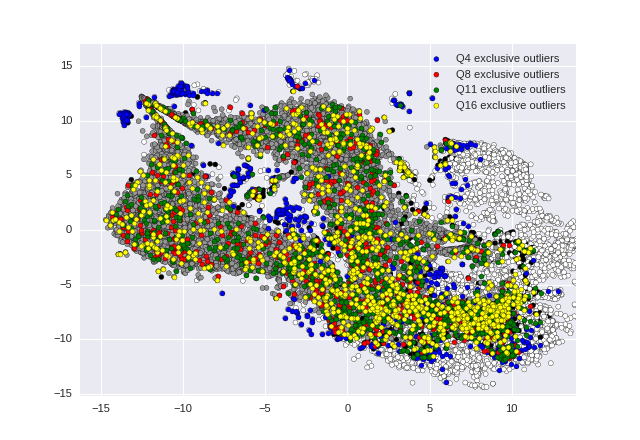

In [214]:
plt.scatter(sample_4.tsne_x,sample_4.tsne_y,c=sample_4.db_out)
plt.scatter(exc4_4.tsne_x,exc4_4.tsne_y,c='blue',label="Q4 exclusive outliers")
plt.scatter(exc8_4.tsne_x,exc8_4.tsne_y,c='red',label="Q8 exclusive outliers")
plt.scatter(exc11_4.tsne_x,exc11_4.tsne_y,c='green',label="Q11 exclusive outliers")
plt.scatter(exc16_4.tsne_x,exc16_4.tsne_y,c='yellow',label="Q16 exclusive outliers")
plt.legend()

In [95]:
plt.scatter(exc8_4.tsne_x,exc8_4.tsne_y,c='red')
out4 = Q4.data[Q4.data.index.str.contains('|'.join(out_all))]
out8 = Q8.data[Q8.data.index.str.contains('|'.join(out_all))]
out11 = Q11.data[Q11.data.index.str.contains('|'.join(out_all))]
out16 = Q16.data[Q16.data.index.str.contains('|'.join(out_all))]

In [124]:
in4 = Q4.data[~Q4.data.index.str.contains('|'.join(out_all))].sample(10000)
kid_in4 = np.array([i[:13] for i in in4.index])
in8 = Q8.data[Q8.data.index.str.contains('|'.join(kid_in4))]
in11 = Q11.data[Q11.data.index.str.contains('|'.join(kid_in4))]
in16 = Q16.data[Q16.data.index.str.contains('|'.join(kid_in4))]

In [140]:
sample_4 = pd.concat([out4,in4])
sample_8 = pd.concat([out8,in8])
sample_11 = pd.concat([out11,in11])
sample_16 = pd.concat([out16,in16])

In [145]:
sample_4.to_csv('paper_sample_4')
sample_8.to_csv('paper_sample_8')
sample_11.to_csv('paper_sample_11')
sample_16.to_csv('paper_sample_16')

In [147]:
tsne4 = Q4.tsne_fit(sample_4.iloc[:,0:60])

[t-SNE] Computing 5551 nearest neighbors...
[t-SNE] Indexed 18507 samples in 0.077s...
[t-SNE] Computed neighbors for 18507 samples in 48.833s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18507
[t-SNE] Computed conditional probabilities for sample 2000 / 18507
[t-SNE] Computed conditional probabilities for sample 3000 / 18507
[t-SNE] Computed conditional probabilities for sample 4000 / 18507
[t-SNE] Computed conditional probabilities for sample 5000 / 18507
[t-SNE] Computed conditional probabilities for sample 6000 / 18507
[t-SNE] Computed conditional probabilities for sample 7000 / 18507
[t-SNE] Computed conditional probabilities for sample 8000 / 18507
[t-SNE] Computed conditional probabilities for sample 9000 / 18507
[t-SNE] Computed conditional probabilities for sample 10000 / 18507
[t-SNE] Computed conditional probabilities for sample 11000 / 18507
[t-SNE] Computed conditional probabilities for sample 12000 / 18507
[t-SNE] Computed conditional probabilities for 

In [200]:
sample_4['tsne_x']=tsne4[:,0]
sample_4['tsne_y']=tsne4[:,1]
sample_4.columns

Index([u'absmeansecder', u'amp', u'autocorrcoef', u'coeffvar', u'diff_asymm',
       u'flatmean', u'flatrat', u'g_asymm', u'kurt', u'len_nmax', u'len_nmin',
       u'longtermtrend', u'mad', u'magratio', u'mautocorrcoef', u'maxslope',
       u'maxvars', u'maxvarsr', u'mbp', u'meanabsslope', u'meanmedrat',
       u'meannslope', u'meanpslope', u'mid20', u'mid35', u'mid50', u'mid65',
       u'mid80', u'minslope', u'naiveperiod', u'normamp', u'num_nsdspikes',
       u'num_nspikes', u'num_pm', u'num_psdspikes', u'num_pspikes',
       u'num_zcross', u'numnegoutliers', u'numout1s', u'numoutliers',
       u'numposoutliers', u'oeratio', u'percentamp', u'periodicity',
       u'periodicityr', u'pstrend', u'ptpslopes', u'rough_g_asymm',
       u'roundmean', u'roundrat', u'sautocorrcoef', u'skews', u'skewslope',
       u'stdratio', u'stds', u'tflatmean', u'troundmean', u'varabsslope',
       u'varslope', u'varss', u'db_out', u'pca_x', u'pca_y', u'db_cluster',
       u'tsne_x', u'tsne_y'],
      dtyp

<IPython.core.display.Javascript object>


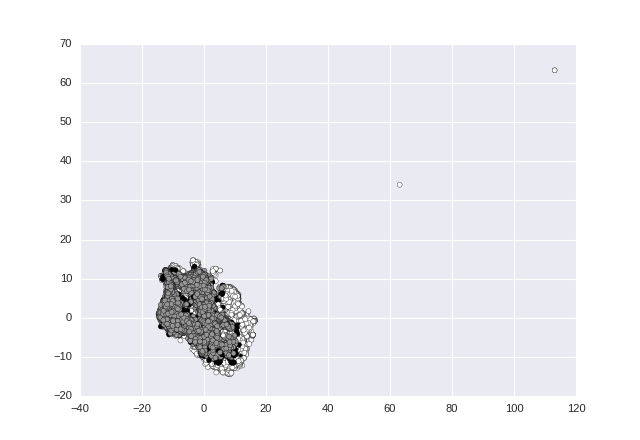

In [195]:
plt.scatter(sample_4.tsne_x,sample_4.tsne_y,c=sample_4.db_out)

In [24]:
from sklearn import preprocessing
def scale_sample(Q):
    data = Q.iloc[:,0:60]
    scaler = preprocessing.StandardScaler().fit(data)
    scaledData = scaler.transform(data)
    df_scaled = pd.DataFrame(columns=Q.columns[0:60],index = Q.index,data=scaledData)
    
    return df_scaled

In [6]:
from sklearn.neighbors import NearestNeighbors
def near_neighbors(q):
    Qob = Q_dict[q]
    Q = Qob.dataSample
    df_scaled = scale_sample(Q)

    nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree',n_jobs=-1).fit(df_scaled)
    distances, indices = nbrs.kneighbors(df_scaled)
    return distances, indices

distances, indices = near_neighbors('Q8')

In [22]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [23]:
def eps_est(data,n=4,verbose=True):
    # distance array containing all distances
    if verbose:print("Calculating nearest neighbor distances...")
    nbrs = NearestNeighbors(n_neighbors=max(n+1,100), algorithm='ball_tree',n_jobs=-1).fit(data)
    distances, indices = nbrs.kneighbors(data)
    del nbrs
    distArr = distances[:,n]
    distArr.sort()
    del distances
    pts = range(len(distArr))

    # The following looks for the first instance (past the mid point)
    # where the mean of the following [number] points
    # is at least (cutoff-1)*100% greater than the mean of the previous [number] points.
    
    number = int(np.ceil(len(data)/500))
    cutoff = 1.05
    if verbose:print("Finding elbow...")
    
    for i in range(int(np.ceil(len(pts)/2)),len(pts)-number):
        if np.mean(distArr[i+1:i+number])>=cutoff*np.mean(distArr[i-number:i-1]):
            dbEps = distArr[i]
            pt=pts[i]
            break

    if verbose:
        print("""
        Epsilon is in the neighborhood of {:05.2f}.
        """.format(dbEps))
    return dbEps,distArr

In [7]:
def dbscan_w_outliers(data,min_n=4,check_tabby=False,verbose=True):
    min_n=int(np.ceil(len(data)/50))
    # numpy array of dataframe for fit later
    X=np.array([np.array(data.loc[i]) for i in data.index])
    if verbose:print("Estimating Parameters...")
    if len(X)>10000:
        # Large datasets have presented issues where a single high density cluster 
        # leads to an epsilon of 0.0 for 4 neighbors.
        # We adjust for this by calculating epsilon with 4 neighbors
        # for a sample of the data, then we scale min_neighbors accordingly.
        if verbose:print("Sampling data for parameter estimation...")
        X_sample = data.sample(n=10000)
    else:
        X_sample = data
    dbEps,distArr = eps_est(X_sample,n=min_n,verbose=verbose)
    
    if verbose:print("Clustering data with DBSCAN, eps={:05.2f},min_samples={}...".format(dbEps,min_n))
    est = DBSCAN(eps=dbEps,min_samples=min_n,n_jobs=-1)
    est.fit(X)
    clusterLabels = est.labels_
    # Outlier score: distance to 4th neighbor?

    if check_tabby:
        if data.index.str.contains('8462852').any():
            tabbyInd = list(data.index).index(data[data.index.str.contains('8462852')].index[0])
            if clusterLabels[tabbyInd] == -1:
                print("Tabby has been found to be an outlier in DBSCAN.")
            else:
                print("Tabby has NOT been found to be an outlier in DBSCAN")
        else:
            print("MISSING: Tabby is not in this data.")
                     
    numout = len(clusterLabels[clusterLabels==-1])
    numclusters = max(clusterLabels+1)
    if verbose:
        if numclusters==1:
            print("There was %s cluster and %s total outliers"%(numclusters,numout))
        else:
            print("There were %s clusters and %s total outliers"%(numclusters,numout))

    return clusterLabels

In [8]:
from sklearn import preprocessing
def scale_sample(df):
    Q = df
    data = Q.iloc[:,0:60]
    scaler = preprocessing.StandardScaler().fit(data)
    scaledData = scaler.transform(data)
    df_scaled = pd.DataFrame(columns=Q.columns[0:60],index = Q.index,data=scaledData)
    dbout = dbscan_w_outliers(df_scaled,min_n=4,check_tabby=True,verbose=True)
    del(Q)
    del(data)
    del(scaler)
    del(scaledData)
    del(df_scaled)
    
    return dbout

Q8.randSampleWTabby(10000)
db_labels = cluster_sample(Q8.dataSample)

Creating random file list...
Checking for Tabby...
Adding Tabby...
Estimating Parameters...
Calculating nearest neighbor distances...
Finding elbow...

        Epsilon is in the neighborhood of 10.22.
        
Clustering data with DBSCAN, eps=10.22,min_samples=200...
Tabby has NOT been found to be an outlier in DBSCAN
There was 1 cluster and 112 total outliers
Creating random file list...
Checking for Tabby...
Adding Tabby...
Estimating Parameters...
Calculating nearest neighbor distances...
Finding elbow...

        Epsilon is in the neighborhood of 14.93.
        
Clustering data with DBSCAN, eps=14.93,min_samples=200...
Tabby has NOT been found to be an outlier in DBSCAN
There was 1 cluster and 77 total outliers
Creating random file list...
Checking for Tabby...
Adding Tabby...
Estimating Parameters...
Calculating nearest neighbor distances...
Finding elbow...

        Epsilon is in the neighborhood of 12.56.
        
Clustering data with DBSCAN, eps=12.56,min_samples=200...
Tabby h

In [ ]:
from datetime import datetime
from sklearn import preprocessing
def cluster_sample(q):
    
    Qob = Q_dict[q]
    Q = Qob.dataSample
    data = Q.iloc[:,0:60]
    scaler = preprocessing.StandardScaler().fit(data)
    scaledData = scaler.transform(data)
    df_scaled = pd.DataFrame(columns=Q.columns[0:60],index = Q.index,data=scaledData)
    
    
    return Qob.db_out(df_scaled,check_tabby=True)

start = datetime.now()
Q4.dataSample['db_out'] = cluster_sample('Q4')
print(datetime.now()-start)

start = datetime.now()
Q8.dataSample['db_out'] = cluster_sample('Q8')
print(datetime.now()-start)

start = datetime.now()
Q11.dataSample['db_out'] = cluster_sample('Q11')
print(datetime.now()-start)

start = datetime.now()
Q16.dataSample['db_out'] = cluster_sample('Q16')
print(datetime.now()-start)

Estimating Parameters...

        Epsilon is in the neighborhood of 21.763520029.
        
Clustering data with DBSCAN...


In [9]:
for q in Q_dict:
    pca = Q_dict[q].pca_fit(Q_dict[q].dataSample.iloc[:,0:60])
    Q_dict[q].dataSample['pca_x'] = pca.T[0]
    Q_dict[q].dataSample['pca_y'] = pca.T[1]

In [12]:
def cluster_sample(q):
    start = datetime.now()
    Q = q.outliers
    data = Q.iloc[:,0:60]
    scaler = preprocessing.StandardScaler().fit(data)
    scaledData = scaler.transform(data)
    df_scaled = pd.DataFrame(columns=Q.columns[0:60],index = Q.index,data=scaledData)
    db_labels = q.db_out(df_scaled)
    print(datetime.now()-start)

    return db_labels

for q in Q_dict:
    Q = Q_dict[q]
    Q.outliers = Q.dataSample[Q.dataSample.db_out == -1]
    Q.outliers['out_out'] = cluster_sample(Q)

Estimating Parameters...

    Epsilon is in the neighborhood of 6.94193875491, 
    with an average of 790.0 neighbors within epsilon,
    395.0 neighbors in half circle (neighbors/2).
    
Clustering data with DBSCAN...
Tabby has not Not found to be an outlier in DBSCAN
There were 1 clusters and 213 total outliers
0:00:06.940155


/home/dgiles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Estimating Parameters...

    Epsilon is in the neighborhood of 7.10991455506, 
    with an average of 1121.0 neighbors within epsilon,
    560.5 neighbors in half circle (neighbors/2).
    
Clustering data with DBSCAN...
Tabby has not Not found to be an outlier in DBSCAN
There were 1 clusters and 236 total outliers
0:00:13.435256
Estimating Parameters...

    Epsilon is in the neighborhood of 6.12068023561, 
    with an average of 880.0 neighbors within epsilon,
    440.0 neighbors in half circle (neighbors/2).
    
Clustering data with DBSCAN...
There were 1 clusters and 372 total outliers
0:00:07.660973
Estimating Parameters...

    Epsilon is in the neighborhood of 5.96482020724, 
    with an average of 810.0 neighbors within epsilon,
    405.0 neighbors in half circle (neighbors/2).
    
Clustering data with DBSCAN...
There were 1 clusters and 356 total outliers
0:00:06.505793


In [19]:
for q in Q_dict:
    Q = Q_dict[q]
    tsne_fit = Q.tsne_fit(Q.outliers.iloc[:,0:60])
    Q.outliers['tsne_x'] = tsne_fit.T[0]
    Q.outliers['tsne_y'] = tsne_fit.T[1]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1183 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3949
[t-SNE] Computed conditional probabilities for sample 2000 / 3949
[t-SNE] Computed conditional probabilities for sample 3000 / 3949
[t-SNE] Computed conditional probabilities for sample 3949 / 3949
[t-SNE] Mean sigma: 2.278248
[t-SNE] KL divergence after 75 iterations with early exaggeration: 0.300924
[t-SNE] Error after 100 iterations: 0.300924
Done.
[t-SNE] Computing pairwise distances...


/home/dgiles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dgiles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[t-SNE] Computing 1681 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5605
[t-SNE] Computed conditional probabilities for sample 2000 / 5605
[t-SNE] Computed conditional probabilities for sample 3000 / 5605
[t-SNE] Computed conditional probabilities for sample 4000 / 5605
[t-SNE] Computed conditional probabilities for sample 5000 / 5605
[t-SNE] Computed conditional probabilities for sample 5605 / 5605
[t-SNE] Mean sigma: 2.112685
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.210839
[t-SNE] Error after 125 iterations: 0.210839
Done.
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1318 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4396
[t-SNE] Computed conditional probabilities for sample 2000 / 4396
[t-SNE] Computed conditional probabilities for sample 3000 / 4396
[t-SNE] Computed conditional probabilities for sample 4000 / 4396
[t-SNE] Computed conditional probabilities for sample 4

In [34]:
Q = Q_dict['Q16']
Q.plot_sample(Q.outliers,Q.fitsDir,Q.outliers.out_out,reduction_method='tsne')

Plotting.
window closed.


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [32]:
Q = Q_dict['Q8']
inliers = Q.outliers[Q.outliers.out_out==0]
outliers = Q.outliers[Q.outliers.out_out==-1]
plt.hexbin(inliers.tsne_x,inliers.tsne_y,mincnt=5,bins="log",cmap = "viridis",gridsize=35)
plt.scatter(outliers.tsne_x,outliers.tsne_y,c='red')
plt.show()

## Output to outliers csv

In [33]:
for q in Q_dict:
    Q = Q_dict[q]
    Q.outliers.to_csv("/home/dgiles/Documents/KeplerLCs/output/"+q+"_outliers.csv")

In [17]:
# Outliers reclustered, re-tsne'd

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_outliers.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q8_outliers.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q8fitsfiles" # path to fits files
Q8 = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q11_outliers.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q11fitsfiles" # path to fits files
Q11 = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q16_outliers.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q16fitsfiles" # path to fits files
Q16 = clusterOutliers.clusterOutliers(featCSV,fitsDir)


Q_dict = {'Q8':Q8,'Q4':Q4,'Q11':Q11,'Q16':Q16}
for q in Q_dict:
    Q = Q_dict[q]
    Q.outliers = Q.data

In [24]:
import pyfits
from matplotlib.widgets import Slider
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import km_outliers
root = Tk.Tk()
root.wm_title("Scatter")
from IPython.display import clear_output
from accelerate.cuda import cuda

"""--- import light curve data ---"""

Q = Qdict['Q8']
Qdf = Q.data
pathtofits = Q.fitsDir
files = Qdf.index
clusterLabels=Qdf.db_out


cmap = matplotlib.cm.ScalarMappable(\
    norm=matplotlib.colors.Normalize(vmin=min(clusterLabels),vmax=max(clusterLabels)),\
    cmap='viridis')
# data is an array containing each data point
data = np.array(Qdf[['tsne_x','tsne_y']])

# tsneX has all the x-coordinates
tsneX = Qdf.tsne_x
# tsneY has all the y-coordinates
tsneY = Qdf.tsne_y

data_out = Qdf[clusterLabels==-1]
outX = data_out.tsne_x
outY = data_out.tsne_y
files_out = data_out.index

data_cluster = Qdf[clusterLabels!=-1]
clusterX = data_cluster.tsne_x
clusterY = data_cluster.tsne_y
files_cluster = data_cluster.index


"""--- Organizing data and Labels ---"""


if Qdf.index.str.contains('8462852').any():
    tabbyInd = list(Qdf.index).index(Qdf[Qdf.index.str.contains('8462852')].index[0])            
else:
    tabbyInd = 0
fig = Figure(figsize=(20,10))

# a tk.DrawingArea
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)
# Toolbar to help navigate the data (pan, zoom, save image, etc.)
toolbar = NavigationToolbar2TkAgg(canvas, root)
toolbar.update()
canvas._tkcanvas.pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)

gs = gridspec.GridSpec(22,6)

def eps_est(data,n):
    
    # distance array containing all distances
    nbrs = NearestNeighbors(n_neighbors=int(np.ceil(.1*len(data))), algorithm='ball_tree',n_jobs=-1).fit(data)
    distances, indices = nbrs.kneighbors(data)
    # Distance to 2*N/100th instead of 4th because: ... reasons
    neighbors = n
    distArr = distances[:,neighbors]
    distArr.sort()
    pts = range(len(distArr))

    # The following looks for the first instance (past the mid point)
    # where the mean of the following [number] points
    # is at least (cutoff-1)*100% greater than the mean of the previous [number] points.
    
    number = 5
    cutoff = 1.05
    for i in range(int(np.ceil(len(pts)/2)),len(pts)-number):
        if np.mean(distArr[i+1:i+number])>=cutoff*np.mean(distArr[i-number:i-1]):
            dbEps = distArr[i]
            pt=pts[i]
            break
            
    return dbEps

with sns.axes_style("white"):
    # empty subplot for scattered data
    ax = fig.add_subplot(gs[0:7,:4])
    # empty subplot for lightcurves
    ax2 = fig.add_subplot(gs[9:18,:])
    # empty subplot for center detail
    ax3 = fig.add_subplot(gs[0:7,4:])
    
    min_points = 4
    eps = eps_est(data,min_points)
    ax_s_min_n = fig.add_subplot(gs[20,:])
    ax_s_eps = fig.add_subplot(gs[21,:])
    s_neighbors = Slider(ax_s_min_n,'Neighbors',1,50,valinit=min_points,valfmt='%2i')
    s_eps = Slider(ax_s_eps,'Epsilon',.01,10,valinit=eps,valfmt='%8.3f')
    
# Set those labels
ax.set_xlabel("Reduced X",fontsize=18)
ax.set_ylabel("Reduced Y",fontsize=18)

ax3.set_title("Center Density Detail")
ax3.set_xlabel("Reduced X",fontsize=18)
ax3.set_ylabel("Reduced Y",fontsize=18)    

def read_kepler_curve(file):
    """
    Given the path of a fits file, this will extract the light curve and normalize it.
    """

    lc = pyfits.getdata(file)
    t = lc.field('TIME')
    f = lc.field('PDCSAP_FLUX')
    err = lc.field('PDCSAP_FLUX_ERR')

    err = err[np.isfinite(t)]
    f = f[np.isfinite(t)]
    t = t[np.isfinite(t)]
    err = err[np.isfinite(f)]
    t = t[np.isfinite(f)]
    f = f[np.isfinite(f)]
    err = err/np.median(f)
    nf = f / np.median(f)

    return t, nf, err
    
@cuda.jit
def distance_cuda(dx,dy,dd):
    bx = cuda.blockIdx.x # which block in the grid?
    bw = cuda.blockDim.x # what is the size of a block?
    tx = cuda.threadIdx.x # unique thread ID within a blcok
    i = tx + bx * bw + 1
    if i>len(dd):
        return

    # d_ph is a distance placeholder
    d_ph = (dx[i]-dx[0])**2+(dy[i]-dy[0])**2

    dd[i]=d_ph**.5
    return

def distances(pts,ex,ey):
    # Calculates distances between N points
    pts = np.array(pts)
    N=len(pts)

    # Allocate host memory arrays
    # Transpose pts array to n_dims x n_pts, each index of x contains all of a dimensions coordinates
    XT = np.transpose(pts)
    x = np.array(XT[0])
    x = np.insert(x,0,ex)
    y = np.array(XT[1])
    y = np.insert(y,0,ey)
    d = np.zeros(N+1)


    # Allocate and copy GPU/device memory
    d_x = cuda.to_device(x)
    d_y = cuda.to_device(y)
    d_d = cuda.to_device(d)

    threads_per_block = 128
    number_of_blocks =N/128+1 

    distance_cuda [ number_of_blocks, threads_per_block ] (d_x,d_y,d_d)

    d_d.copy_to_host(d)
    return d[1:]   

def calcClosestDatapoint(X, event):
    """Calculate which data point is closest to the mouse position.

    Args:
        X (np.array) - array of points, of shape (numPoints, 2)
        event (MouseEvent) - mouse event (containing mouse position)
    Returns:
        smallestIndex (int) - the index (into the array of points X) of the element closest to the mouse position
    """
    ex,ey = ax.transData.inverted().transform((event.x,event.y))

    #distances = [distance (XT[:,i], event) for i in range(XT.shape[1])]
    Ds = distances(X,ex,ey)
    return np.argmin(Ds)

def drawData(index):
    # Plots the lightcurve of the point chosen
    ax2.cla()
    f = pathtofits+Qdf.index[index]
    t,nf,err=read_kepler_curve(f)

    x=t
    y=nf

    axrange=0.55*(max(y)-min(y))
    mid=(max(y)+min(y))/2
    yaxmin = mid-axrange
    yaxmax = mid+axrange
    if yaxmin < .95:
        if yaxmax > 1.05:
            ax2.set_ylim(yaxmin,yaxmax)
        else:
            ax2.set_ylim(yaxmin,1.05)
    elif yaxmax > 1.05:
        ax2.set_ylim(.95,yaxmax)
    else:
        ax2.set_ylim(.95,1.05)

    if clusterLabels[index]==-1:
        color = 'red'
    else:
        color = cmap.to_rgba(clusterLabels[index])
        
    ax2.plot(x, y, 'o',markeredgecolor='none', c=color, alpha=0.2)
    ax2.plot(x, y, '-',markeredgecolor='none', c=color, alpha=0.7)
    #ax2.set_title(files[index][:13],fontsize = 20)
    ax2.set_xlabel('Time (Days)',fontsize=22)
    ax2.set_ylabel(r'$\frac{\Delta F}{F}$',fontsize=30)

    fig.suptitle(files[index][:13],fontsize=30)

    canvas.draw()

def annotatePt(XT, index,ignore=False):
    """Create popover label in 3d chart

    Args:
        X (np.array) - array of points, of shape (numPoints, 3)
        index (int) - index (into points array X) of item which should be printed
    Returns:
        None
    """
    x2, y2 = XT[index][0], XT[index][1]
    # Either update the position, or create the annotation
    if not ignore:
        if hasattr(annotatePt, 'label'):
            annotatePt.label.remove()
            annotatePt.emph.remove()
        if hasattr(annotatePt, 'emphCD'):
            annotatePt.emphCD.remove()
    
    x_ax = ax.get_xlim()[1]-ax.get_xlim()[0]
    y_ax = ax.get_ylim()[1]-ax.get_ylim()[0]
    # Get data point from array of points X, at position index
    annotatePt.label = ax.annotate( "",
        xy = (x2, y2), xytext = (x2+.1*x_ax, y2+.2*y_ax),
        arrowprops = dict(headlength=20,headwidth=20,width=6,shrink=.1,color='red'))
    annotatePt.emph = ax.scatter(x2,y2,marker='o',s=50,c='red')
    if files[index] in files_cluster:
        annotatePt.emphCD = ax3.scatter(x2,y2,marker='o',s=150,c='red')
    else:
        annotatePt.emphCD = ax.scatter(x2,y2,marker='o',s=50,c='red')
    canvas.draw()


def onMouseClick(event, X):
    """Event that is triggered when mouse is clicked. Shows lightcurve for data point closest to mouse."""
    #XT = np.array(X.T) # array organized by feature, each in it's own array
    closestIndex = calcClosestDatapoint(X, event)
    drawData(closestIndex)

def onMouseRelease(event, X):
    #XT = np.array(X.T)
    closestIndex = calcClosestDatapoint(X, event)
    annotatePt(X,closestIndex)
    #for centerIndex in centerIndices:
    #    annotateCenter(XT,centerIndex)

def connect(X):
    if hasattr(connect,'cidpress'):
        fig.canvas.mpl_disconnect(connect.cidpress)
    if hasattr(connect,'cidrelease'):
        fig.canvas.mpl_disconnect(connect.cidrelease)
    
    connect.cidpress = fig.canvas.mpl_connect('button_press_event', lambda event: onMouseClick(event,X))
    connect.cidrelease = fig.canvas.mpl_connect('button_release_event', lambda event: onMouseRelease(event, X))
    
def enter_axes(event):
    if event.inaxes == ax:
        connect(data)

def leave_axes(event):
    if event.inaxes == ax:
        fig.canvas.mpl_disconnect(connect.cidpress)
        fig.canvas.mpl_disconnect(connect.cidrelease)

def replot():
    ax.cla()
    ax3.cla()
    global cmap
    cmap = matplotlib.cm.ScalarMappable(\
            norm=matplotlib.colors.Normalize(vmin=0,vmax=max(clusterLabels)),\
            cmap='viridis')
    data_out = Qdf[clusterLabels==-1]
    outX = data_out.tsne_x
    outY = data_out.tsne_y
    # Set those labels
    ax.set_xlabel("Reduced X",fontsize=18)
    ax.set_ylabel("Reduced Y",fontsize=18)
    # Scatter the data
    ax.scatter(Qdf[clusterLabels!=-1].tsne_x,Qdf[clusterLabels!=-1].tsne_y,
               c=clusterLabels[clusterLabels!=-1],cmap="viridis",alpha=.5)
    ax.scatter(outX,outY,c='red',s=30,alpha=.8)
    ax.annotate("Outliers: %6i"%len(clusterLabels[clusterLabels==-1]),
               xy=(0,0),textcoords="axes fraction",xytext=(0.05,.9))
    ax.annotate("Clusters: %6i"%(max(clusterLabels)+1),
               xy=(0,0),textcoords="axes fraction",xytext=(0.05,.85))

    ax3.scatter(Qdf[clusterLabels!=-1].tsne_x,Qdf[clusterLabels!=-1].tsne_y,
            c=clusterLabels[clusterLabels!=-1],cmap="viridis",alpha=.2)
    annotatePt(data,tabbyInd,ignore=True)
    
def recluster_km(X_scaled,k):

    global clusterLabels
    clusterLabels = km_outliers.kmeans_w_outliers(X_scaled,min_samples)
    replot()
    
    clear_output()
    df = pd.DataFrame({'tsne_x':X_scaled.tsne_x,
                       'tsne_y':X_scaled.tsne_y,
                       'cluster':clusterLabels})
    
    for i in range(max(clusterLabels)+1):
        center = [sum(Qdf[clusterLabels==i].tsne_x)/len(Qdf[clusterLabels==i]),
                  sum(Qdf[clusterLabels==i].tsne_y)/len(Qdf[clusterLabels==i])]
        distFromCenter = [sum((pt-center)**2)**.5 for pt in np.array(Qdf[clusterLabels==i][['tsne_x','tsne_y']])]
        sigma = np.std(distFromCenter)
        cutoff = 4*sigma
        circle = plt.Circle((center[0],center[1]),cutoff,edgecolor=None,alpha=.2)
        ax.add_artist(circle)
    
    return

def recluster_db(X_scaled,eps,min_samples):
    ax.cla()
    ax3.cla()
    est = DBSCAN(eps=eps,min_samples=min_samples)
    est.fit(X_scaled)

    global clusterLabels
    clusterLabels = est.labels_
    
    clear_output()
    df = pd.DataFrame({'tsne_x':X_scaled.tsne_x,
                       'tsne_y':X_scaled.tsne_y,
                       'cluster':clusterLabels})
    gb = df.groupby('cluster')
    print("""
    %s        
    %s
        """%(gb.count(),gb.std()))
    replot()
    return

def update_eps(val):
    eps = s_eps.val
    min_samples = int(s_neighbors.val)

    #X = Qdf.iloc[:,0:60]
    #scaler = preprocessing.StandardScaler().fit(X)
    #scaledData = scaler.transform(X)
    #X_scaled = pd.DataFrame(columns=X.columns[0:60],index = X.index,data=scaledData)
    
    X_scaled = Qdf[['tsne_x','tsne_y']]
    recluster_db(X_scaled,eps,min_samples)
    return

    
def update_neighbors(val):
    min_samples = int(s_neighbors.val)
    
    #X = Qdf.iloc[:,0:60]
    #scaler = preprocessing.StandardScaler().fit(X)
    #scaledData = scaler.transform(X)
    #X_scaled = pd.DataFrame(columns=X.columns[0:60],index = X.index,data=scaledData)
    
    X_scaled = Qdf[['tsne_x','tsne_y']]
    # Automatically determines a suggestion for epsilon based on the number of neighbors chosen
    eps = eps_est(X_scaled,min_samples)
    # the following changes eps and initiates update_eps
    s_eps.set_val(eps)
    
    return
        
fig.canvas.mpl_connect('axes_enter_event',enter_axes)
fig.canvas.mpl_connect('axes_leave_event',leave_axes)
s_eps.on_changed(update_eps)
s_neighbors.on_changed(update_neighbors)
s_neighbors.set_val(4)
annotatePt(data,tabbyInd)
drawData(tabbyInd)

canvas.draw()
canvas.show()
print("Plotting.")         

def _delete_window():
    print("window closed.")
    root.destroy()
    sys.exit()

root.protocol("WM_DELETE_WINDOW",_delete_window)
root.mainloop()


             tsne_x  tsne_y
cluster                
-1           16      16
 0         3841    3841
 1           25      25
 2            4       4
 3           16      16
 4           14      14
 5           13      13
 6           13      13
 7            4       4
 8            3       3        
                tsne_x     tsne_y
cluster                      
-1       22.819558  10.467281
 0        4.037788   4.507165
 1        0.217006   0.382377
 2        0.050079   0.056157
 3        0.123062   0.105542
 4        0.095739   0.132884
 5        0.052605   0.014126
 6        0.032419   0.007703
 7        0.035876   0.015066
 8        0.030285   0.283041
        
Plotting.
window closed.


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


## Further down the rabbit hole...

In [11]:
Q = Qdict['Q4']
Qdf = Q.outliers
X_scaled = Qdf[['tsne_x','tsne_y']]
Qdf.cluster = km_outliers.kmeans_w_outliers(X_scaled,1)
Q_rh = Qdf[Qdf.cluster==0]
tsne_fit = Q.tsne_fit(Q_rh.iloc[:,0:60])
Q_rh['tsne_x'] = tsne_fit.T[0]
Q_rh['tsne_y'] = tsne_fit.T[1]
plt.scatter(Q_rh.tsne_x,Q_rh.tsne_y)
plt.show()

There were 22 outliers in 1 clusters
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1207 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4027
[t-SNE] Computed conditional probabilities for sample 2000 / 4027
[t-SNE] Computed conditional probabilities for sample 3000 / 4027
[t-SNE] Computed conditional probabilities for sample 4000 / 4027
[t-SNE] Computed conditional probabilities for sample 4027 / 4027
[t-SNE] Mean sigma: 2.265101
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.267778
[t-SNE] Error after 125 iterations: 0.267778
Done.


/home/dgiles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dgiles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
